### Image classification using CNN for pnuemonia dataset(kaggle)

In [19]:
# importing the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from tensorflow.keras.layers import MaxPooling2D
from glob import glob
import matplotlib.pyplot as plt

In [20]:
train_path = 'dataset/train'
test_path = 'dataset/test'
valid_path = 'dataset/val'

image_size = [256,256]

In [21]:
folders = glob('Dataset/*')
folders

['Dataset\\test', 'Dataset\\train', 'Dataset\\val']

In [23]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_data= ImageDataGenerator(rescale = 1./255)
val_data= ImageDataGenerator(rescale = 1./255)

In [24]:
# Make sure you provide the same target size as initialied for the image size
train = train_data.flow_from_directory('Dataset/Train',
                                                 target_size = (256,256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test = test_data.flow_from_directory('Dataset/Test',
                                            target_size = (256,256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

val = val_data.flow_from_directory('Dataset/val',
                                            target_size = (256,256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [25]:
### Creating CNN model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(50,activation="relu"))
model.add(Dense(2,activation="softmax"))


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 256, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 32)      2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 128)      

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('C1.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
outcome = model.fit(train, validation_data = test, epochs = 20, steps_per_epoch=len(train),  validation_steps=len(test))

Epoch 1/20
163/163 [==============================] - 351s 2s/step - loss: 0.2685 - accuracy: 0.8892 - val_loss: 0.5458 - val_accuracy: 0.8125
Epoch 2/20
163/163 [==============================] - 478s 3s/step - loss: 0.2040 - accuracy: 0.9218 - val_loss: 0.5109 - val_accuracy: 0.8590
Epoch 3/20
163/163 [==============================] - 1157s 7s/step - loss: 0.1770 - accuracy: 0.9342 - val_loss: 0.3770 - val_accuracy: 0.8830
Epoch 4/20
163/163 [==============================] - 788s 5s/step - loss: 0.1532 - accuracy: 0.9454 - val_loss: 0.8483 - val_accuracy: 0.8558
Epoch 5/20
163/163 [==============================] - 926s 6s/step - loss: 0.1558 - accuracy: 0.9402 - val_loss: 0.6427 - val_accuracy: 0.8413
Epoch 6/20
163/163 [==============================] - 893s 5s/step - loss: 0.1296 - accuracy: 0.9517 - val_loss: 0.5509 - val_accuracy: 0.8750
Epoch 7/20
163/163 [==============================] - 739s 5s/step - loss: 0.1358 - accuracy: 0.9536 - val_loss: 0.6313 - val_accuracy: 0.878

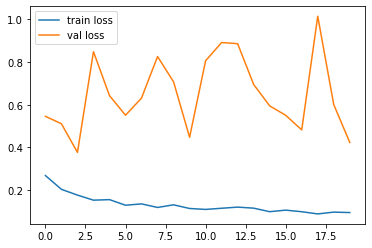

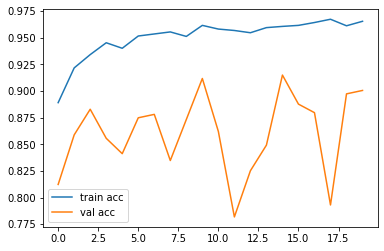

<Figure size 432x288 with 0 Axes>

In [31]:
# plot the loss
plt.plot(outcome.history['loss'], label='train loss')
plt.plot(outcome.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(outcome.history['accuracy'], label='train acc')
plt.plot(outcome.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [35]:
model.evaluate(val)

1/1 [==============================] - 1s 1s/step - loss: 0.0651 - accuracy: 1.0000


[0.06514778733253479, 1.0]

In [37]:
# saving the model as h5 file
import tensorflow as tf
from keras.models import load_model
model.save('chest_xray_cnn.h5')